In [1]:
#Importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
#loading the file

HSG_df=pd.read_csv('Housing_Train.csv')

<AxesSubplot:>

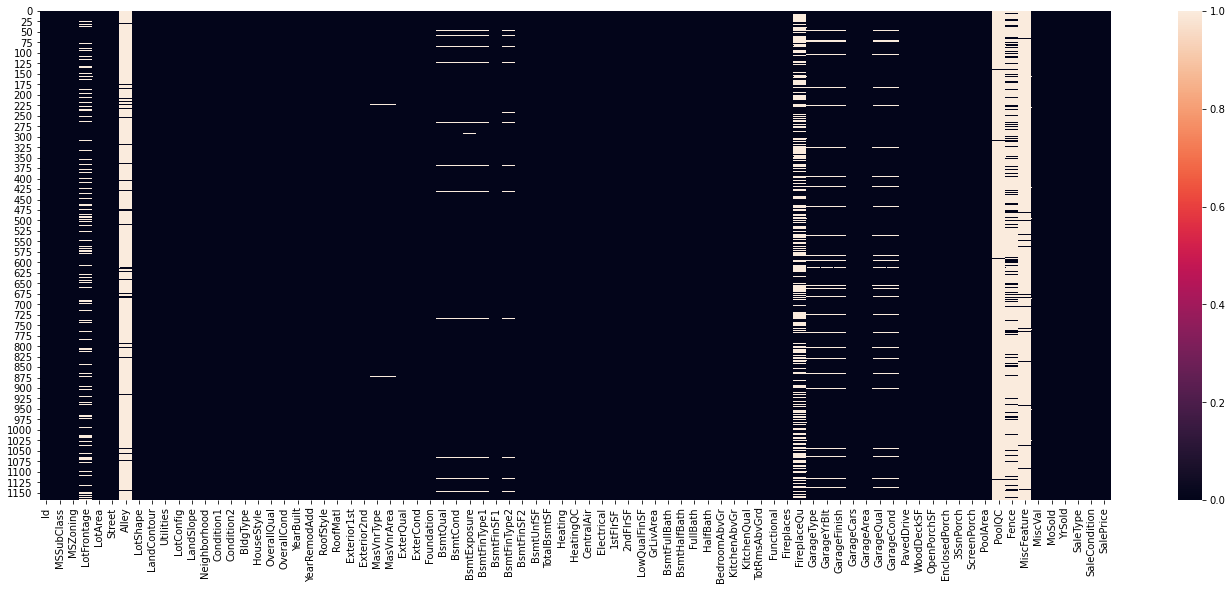

In [3]:
#Checking null values via plot
plt.figure(figsize=(24,9))
sns.heatmap(HSG_df.isnull())

In [4]:
# count of null values

HSG_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [5]:
#Creating list of columns with missing data
HSG_df.columns[HSG_df.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'],
      dtype='object')

In [6]:
#Creating datafram of coulmns with null values

column_null = HSG_df.columns[HSG_df.isnull().any()]

for column in column_null:
    print(column, HSG_df[column].isnull().sum())

LotFrontage 214
Alley 1091
MasVnrType 7
MasVnrArea 7
BsmtQual 30
BsmtCond 30
BsmtExposure 31
BsmtFinType1 30
BsmtFinType2 31
FireplaceQu 551
GarageType 64
GarageYrBlt 64
GarageFinish 64
GarageQual 64
GarageCond 64
PoolQC 1161
Fence 931
MiscFeature 1124


In [7]:
#Dropping columns which are having null values more than 40% in that column
Drop_column=[]
for column in column_null:
    if HSG_df[column].isnull().sum()*100.0/HSG_df.shape[0] > 40:
        Drop_column.append(column)

In [8]:
HSG_df = HSG_df.drop(Drop_column, axis=1)

<AxesSubplot:>

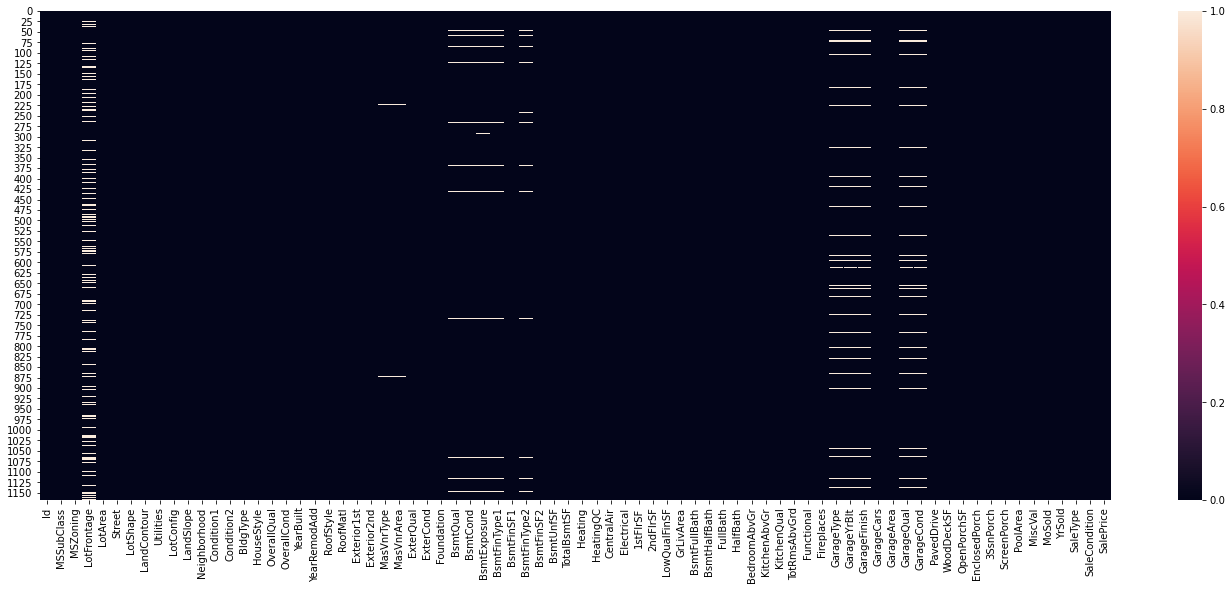

In [9]:
#Checking again null values via plot
plt.figure(figsize=(24,9))
sns.heatmap(HSG_df.isnull())

In [10]:
# Look at all of the empty features
empty_features = []

for column in HSG_df.columns:
    if HSG_df[column].isnull().nunique() == 2:
        empty_features.append(column)

In [11]:
for x in empty_features:
    print(x, HSG_df[x].isnull().sum())

LotFrontage 214
MasVnrType 7
MasVnrArea 7
BsmtQual 30
BsmtCond 30
BsmtExposure 31
BsmtFinType1 30
BsmtFinType2 31
GarageType 64
GarageYrBlt 64
GarageFinish 64
GarageQual 64
GarageCond 64


In [12]:
removed_features = []
for feature in empty_features:
    if HSG_df[feature].isnull().sum() <= 7:
        HSG_df[feature] = HSG_df[feature].fillna(value=HSG_df[feature].mode()[0])
        removed_features.append(feature)

In [13]:
empty_features = [x for x in empty_features if x not in removed_features]
HSG_df[empty_features].isnull().sum()

LotFrontage     214
BsmtQual         30
BsmtCond         30
BsmtExposure     31
BsmtFinType1     30
BsmtFinType2     31
GarageType       64
GarageYrBlt      64
GarageFinish     64
GarageQual       64
GarageCond       64
dtype: int64

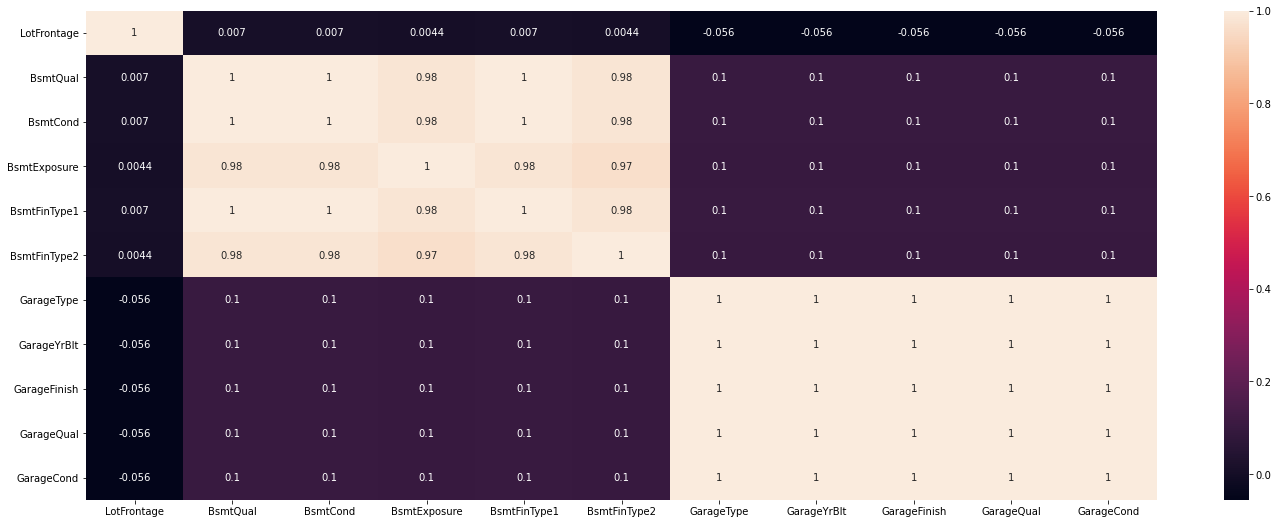

In [14]:
plt.figure(figsize=(24,9))
sns.heatmap(HSG_df[empty_features].isnull().corr(), annot=True);

In [15]:
# Setting coulmns null values to mean
HSG_df['LotFrontage'] = HSG_df['LotFrontage'].fillna(value=HSG_df['LotFrontage'].mean())
HSG_df['GarageYrBlt'] = HSG_df['GarageYrBlt'].fillna(value=HSG_df['GarageYrBlt'].mean())

In [16]:
# Setting values to zero
HSG_df['MasVnrArea'] = HSG_df['MasVnrArea'].fillna(value=0)

In [17]:
# Set the following values to 'None'
none_col = ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

for feature in none_col:
    HSG_df[feature] = HSG_df[feature].fillna(value='None')

<AxesSubplot:>

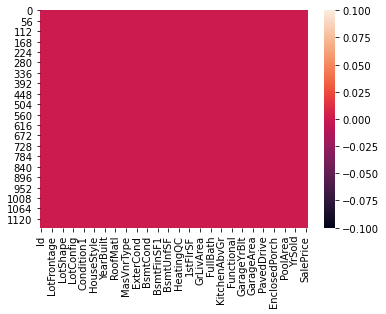

In [18]:
sns.heatmap(HSG_df.isnull())

In [19]:
#checking if any is pending
HSG_df.drop('SalePrice', axis=1).isnull().sum().sum()

0

In [20]:
#checking skewness
HSG_df.skew()

Id                0.026526
MSSubClass        1.422019
LotFrontage       2.710383
LotArea          10.659285
OverallQual       0.175082
OverallCond       0.580714
YearBuilt        -0.579204
YearRemodAdd     -0.495864
MasVnrArea        2.835718
BsmtFinSF1        1.871606
BsmtFinSF2        4.365829
BsmtUnfSF         0.909057
TotalBsmtSF       1.744591
1stFlrSF          1.513707
2ndFlrSF          0.823479
LowQualFinSF      8.666142
GrLivArea         1.449952
BsmtFullBath      0.627106
BsmtHalfBath      4.264403
FullBath          0.057809
HalfBath          0.656492
BedroomAbvGr      0.243855
KitchenAbvGr      4.365259
TotRmsAbvGrd      0.644657
Fireplaces        0.671966
GarageYrBlt      -0.662934
GarageCars       -0.358556
GarageArea        0.189665
WoodDeckSF        1.504929
OpenPorchSF       2.410840
EnclosedPorch     3.043610
3SsnPorch         9.770611
ScreenPorch       4.105741
PoolArea         13.243711
MiscVal          23.065943
MoSold            0.220979
YrSold            0.115765
S

In [21]:
#Removing skewness using log transform
log_SalePrice= np.log(HSG_df['SalePrice'])
log_SalePrice.skew()

0.07359740998337982

In [22]:
#Adding log sale price to dataframe
HSG_df['Log_SalePrice'] = np.log(HSG_df['SalePrice'])

In [23]:
HSG_df.skew()

Id                0.026526
MSSubClass        1.422019
LotFrontage       2.710383
LotArea          10.659285
OverallQual       0.175082
OverallCond       0.580714
YearBuilt        -0.579204
YearRemodAdd     -0.495864
MasVnrArea        2.835718
BsmtFinSF1        1.871606
BsmtFinSF2        4.365829
BsmtUnfSF         0.909057
TotalBsmtSF       1.744591
1stFlrSF          1.513707
2ndFlrSF          0.823479
LowQualFinSF      8.666142
GrLivArea         1.449952
BsmtFullBath      0.627106
BsmtHalfBath      4.264403
FullBath          0.057809
HalfBath          0.656492
BedroomAbvGr      0.243855
KitchenAbvGr      4.365259
TotRmsAbvGrd      0.644657
Fireplaces        0.671966
GarageYrBlt      -0.662934
GarageCars       -0.358556
GarageArea        0.189665
WoodDeckSF        1.504929
OpenPorchSF       2.410840
EnclosedPorch     3.043610
3SsnPorch         9.770611
ScreenPorch       4.105741
PoolArea         13.243711
MiscVal          23.065943
MoSold            0.220979
YrSold            0.115765
S

<AxesSubplot:xlabel='Log_SalePrice', ylabel='Count'>

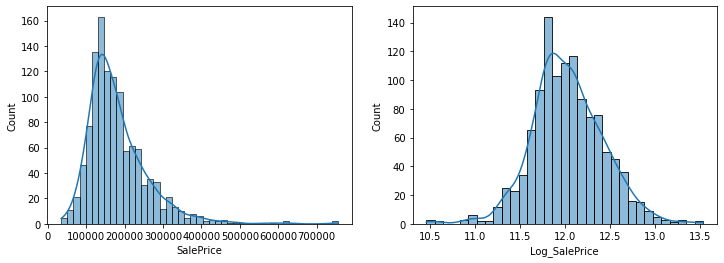

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
sns.histplot(x='SalePrice', data=HSG_df, kde=True, ax=axes[0])
sns.histplot(x='Log_SalePrice', data=HSG_df, kde=True, ax=axes[1])

In [25]:
#Separating columns
Time_col= list(HSG_df.columns[HSG_df.columns.str.contains('Yr|Year')])
print('Time columns:\n',Time_col)

Object_col= list(set(HSG_df.select_dtypes(include=['object']).columns) - set(Time_col))
print('Object columns:\n', Object_col)

Numeric_col= list(set(HSG_df.select_dtypes(exclude=['object']).columns) - set(Time_col))
print('Numeric columns:\n',Numeric_col)

Time columns:
 ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']
Object columns:
 ['Street', 'SaleCondition', 'RoofStyle', 'MasVnrType', 'Functional', 'BsmtFinType1', 'Utilities', 'BsmtCond', 'LandSlope', 'MSZoning', 'Condition2', 'BldgType', 'Heating', 'PavedDrive', 'GarageFinish', 'CentralAir', 'Exterior2nd', 'KitchenQual', 'GarageQual', 'Neighborhood', 'LandContour', 'Electrical', 'ExterQual', 'BsmtExposure', 'GarageCond', 'RoofMatl', 'ExterCond', 'SaleType', 'Exterior1st', 'HeatingQC', 'LotShape', 'LotConfig', 'GarageType', 'BsmtFinType2', 'BsmtQual', 'HouseStyle', 'Foundation', 'Condition1']
Numeric columns:
 ['MoSold', 'Id', 'BsmtHalfBath', 'LowQualFinSF', 'MiscVal', 'HalfBath', 'OverallCond', 'SalePrice', 'MSSubClass', 'OverallQual', 'LotFrontage', 'TotRmsAbvGrd', 'MasVnrArea', 'GrLivArea', '3SsnPorch', 'BsmtUnfSF', 'GarageArea', 'BsmtFullBath', 'BsmtFinSF1', 'FullBath', 'ScreenPorch', 'Fireplaces', 'KitchenAbvGr', '1stFlrSF', 'EnclosedPorch', 'BedroomAbvGr', 'WoodDeckSF', 

<AxesSubplot:>

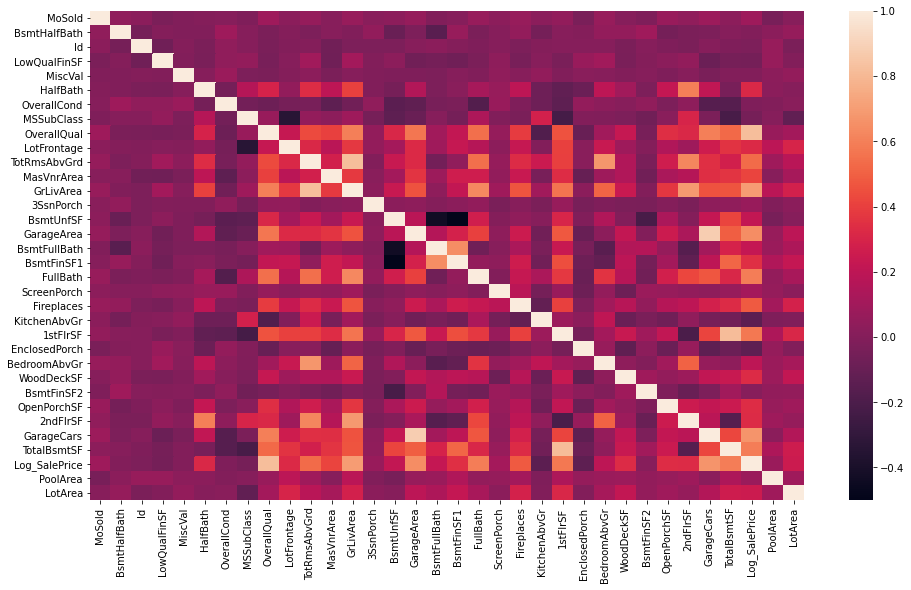

In [26]:
#Checking correlation betweens Numeric and Sale price
plt.figure(figsize=(16,9))
sns.heatmap(HSG_df[list(set(Numeric_col) - {'SalePrice'})].corr())

<AxesSubplot:xlabel='YrSold', ylabel='Log_SalePrice'>

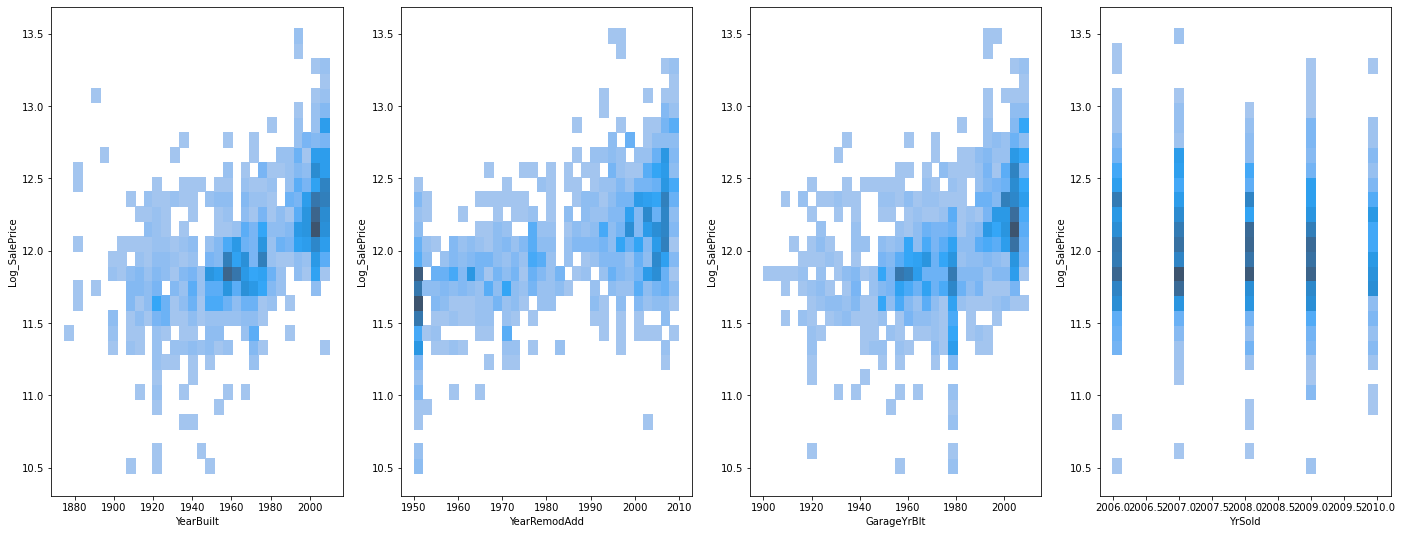

In [27]:
#Analysing Time columns
fig, axes = plt.subplots(1,4,figsize=(24, 9))
sns.histplot(x='YearBuilt', y='Log_SalePrice', data=HSG_df, kde=True, ax=axes[0],bins=30)
sns.histplot(x='YearRemodAdd', y='Log_SalePrice', data=HSG_df, kde=True, ax=axes[1],bins=30)
sns.histplot(x='GarageYrBlt', y='Log_SalePrice', data=HSG_df, kde=True, ax=axes[2],bins=30)
sns.histplot(x='YrSold', y='Log_SalePrice', data=HSG_df, kde=True, ax=axes[3],bins=30)

In [28]:
# Applying Label Encoder
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()

for col in Object_col:
    HSG_df[col] = label_enc.fit_transform(HSG_df[col])

In [29]:
HSG_df.tail(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Log_SalePrice
1148,985,90,3,75.00000,10125,1,3,3,0,4,...,0,0,0,0,8,2009,0,4,126000,11.744037
1149,971,50,3,60.00000,10800,1,3,3,0,4,...,0,0,0,0,12,2006,8,0,135000,11.813030
1150,679,20,3,80.00000,11844,1,0,3,0,4,...,0,0,0,0,7,2009,6,5,372500,12.827992
1151,1109,60,3,70.98847,8063,1,3,3,0,4,...,0,0,0,0,11,2007,8,0,181000,12.106252
1152,1423,120,4,37.00000,4435,1,3,3,0,4,...,0,0,0,0,3,2008,8,4,136500,11.824080
1153,222,60,3,70.98847,8068,1,0,3,0,4,...,0,0,0,0,12,2009,4,4,200000,12.206073
1154,168,60,3,86.00000,10562,1,3,3,0,4,...,0,0,0,0,11,2007,6,5,325624,12.693499
1155,1186,50,3,60.00000,9738,1,3,3,0,4,...,0,0,0,0,3,2006,8,4,104900,11.560763
1156,585,50,4,51.00000,6120,1,3,3,0,4,...,0,120,0,0,7,2009,8,4,133000,11.798104
1157,201,20,4,80.00000,8546,1,3,3,0,0,...,0,0,0,0,3,2010,8,4,140000,11.849398


In [30]:
HSG_df.corr()['Log_SalePrice']

Id              -0.025061
MSSubClass      -0.045982
MSZoning        -0.150009
LotFrontage      0.320448
LotArea          0.250576
                   ...   
YrSold          -0.048638
SaleType        -0.036798
SaleCondition    0.260353
SalePrice        0.945729
Log_SalePrice    1.000000
Name: Log_SalePrice, Length: 77, dtype: float64

In [31]:
#SPlitting into train_test

y=HSG_df['Log_SalePrice']
X=HSG_df.drop(['SalePrice', 'Log_SalePrice'], axis=1)

In [32]:
#Train-Test Split
from sklearn.model_selection import train_test_split

In [33]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.30, random_state=41)

In [34]:
x_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
844,161,20,3,70.98847,11120,1,0,3,0,1,...,0,0,0,0,0,0,6,2008,8,4
335,197,20,3,79.00000,9416,1,3,3,0,4,...,138,0,0,266,0,0,9,2007,6,5
882,1328,20,3,60.00000,6600,1,3,3,0,4,...,0,0,0,0,0,0,10,2008,8,4
1160,551,120,3,53.00000,4043,1,3,3,0,4,...,55,0,0,200,0,0,10,2008,0,0
622,643,80,3,75.00000,13860,1,3,3,0,4,...,111,0,0,0,0,0,7,2009,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,723,20,3,70.00000,8120,1,3,3,0,4,...,0,0,0,0,0,0,7,2009,8,4
243,333,20,3,85.00000,10655,1,0,3,0,4,...,0,0,0,0,0,0,10,2009,8,4
321,669,20,3,70.98847,14175,1,3,0,0,0,...,0,0,0,0,0,0,11,2006,8,4
1104,748,70,4,65.00000,11700,1,0,3,0,0,...,0,386,0,0,0,0,5,2009,8,4


In [35]:
y_train

844     11.998433
335     12.650348
882     11.779129
1160    11.849398
622     12.751300
          ...    
407     11.732061
243     12.556730
321     12.031719
1104    12.491173
931     12.106252
Name: Log_SalePrice, Length: 817, dtype: float64

In [36]:
x_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
975,774,20,3,70.00000,10150,1,3,3,0,4,...,0,0,0,0,0,0,7,2007,0,4
586,1247,60,1,65.00000,8125,1,3,3,0,4,...,45,0,0,0,0,0,3,2006,6,5
707,1211,60,3,70.00000,11218,1,3,3,0,4,...,104,0,0,0,0,400,5,2010,8,4
692,204,120,4,70.98847,4438,1,3,3,0,4,...,0,0,0,0,0,0,1,2008,8,4
557,546,50,3,70.98847,13837,1,0,3,0,0,...,0,0,0,0,0,0,2,2006,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628,1127,120,3,53.00000,3684,1,3,3,0,4,...,20,0,0,0,0,0,6,2009,8,4
645,1245,70,3,70.98847,11435,1,0,1,0,0,...,0,0,0,0,0,0,6,2006,8,4
878,1331,20,3,85.00000,10000,1,3,3,0,4,...,45,0,0,0,0,0,12,2007,8,4
909,603,60,3,80.00000,10041,1,0,3,0,4,...,150,0,0,0,0,0,2,2006,8,0


In [37]:
y_test

975    11.648330
586    12.136187
707    12.149502
692    11.911702
557    12.341477
         ...    
628    12.066811
645    12.345835
878    12.332705
909    12.301383
408    12.259613
Name: Log_SalePrice, Length: 351, dtype: float64

In [38]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [39]:
#Linear regression model

regression=LinearRegression()

regression.fit(x_train,y_train)

LinearRegression()

In [40]:
regression.score(x_train,y_train)

0.8984641814956189

In [41]:
regression.score(x_test,y_test)

0.7454326968649743

In [42]:
y_pred=regression.predict(x_test)

In [43]:
r2_score(y_test,y_pred)

0.7454326968649743

In [44]:
#Finding MSE,RMSE,MAPE
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math

MSE = mean_squared_error(y_test, y_pred)
 
RMSE = math.sqrt(MSE)

MAPE = mean_absolute_error(y_test, y_pred)*100

print(MSE)
print(RMSE)
print(MAPE)

0.03564748301319448
0.18880541044470756
9.47228258579214


In [45]:
#Random Forest Model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [46]:
random_forest=RandomForestRegressor(n_estimators = 100, random_state = 0)

In [47]:
random_forest.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [48]:
#Checking test data
y_pred = random_forest.predict(x_test)

In [49]:
mse=mean_squared_error(y_test,y_pred)

In [50]:
rmse= mse**.5

In [51]:
MAPE = mean_absolute_error(y_test, y_pred)*100

In [52]:
print(mse)
print(rmse)
print(MAPE)

0.0224174177781217
0.14972447287641957
10.270409440198348
